## 레이더 차트

      팀명  승리  패배  세이브  홀드
0   1위 팀  88  55   51  92
1  10위 팀  48  93   16  47


['승리', '패배', '세이브', '홀드']


[88, 55, 51, 92, 88]


[48, 93, 16, 47, 48]


[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]




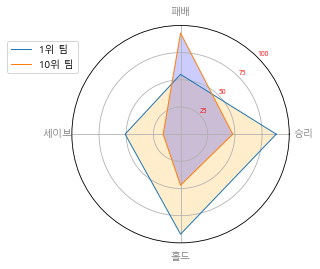

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

kbo = pd.read_csv("kbo.csv")
print(kbo.head())
print("\n")
 
var = kbo.columns.to_list()[1:]
print(var)
print("\n")

val1 = kbo.loc[0, :].drop('팀명').values.tolist()
val1 += val1[:1]
print(val1)
print("\n")

val2 = kbo.loc[1, :].drop('팀명').values.tolist()
val2 += val2[:1]
print(val2)
print("\n")

num_var = len(var)
deg = [n / float(num_var) * 2 * pi for n in range(num_var)]
deg += deg[:1]
print(deg)
print("\n")

from matplotlib import font_manager, rc
font_path = "malgun.ttf"  
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
 
ax = plt.subplot(111, polar=True)
plt.xticks(deg[:-1], var, color='grey', size=10)
 
ax.set_rlabel_position(45)
plt.yticks([25,50,75,100], ["25","50","75","100"], color="red", size=7)
plt.ylim(0,100)

ax.plot(deg, val1, linewidth=1, linestyle='solid', label='1위 팀')
ax.fill(deg, val1, 'orange', alpha=0.2)

ax.plot(deg, val2, linewidth=1, linestyle='solid', label='10위 팀')
ax.fill(deg, val2, 'blue', alpha=0.2)

plt.legend(loc='best', bbox_to_anchor=(0.05, 0.95))

## 히트맵(heatmap)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']


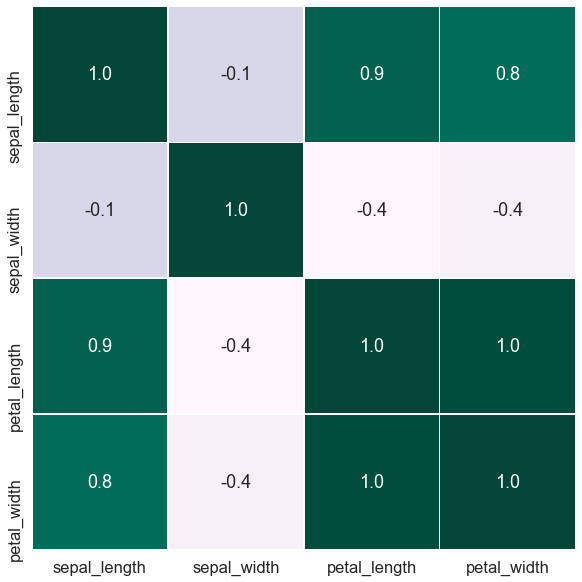

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
 
df = sns.load_dataset('iris')
print(df.head())
print("\n")
print(df.columns.values)

plt.figure(figsize=(10,10))
corr = df.loc[:,'sepal_length':'petal_width'].corr()

sns.set(font_scale=1.5)            
sns.heatmap(corr,                  
            annot=True,            
            cmap='PuBuGn',         
            fmt='.1f',             
            square=True,           
            linewidth=0.5,         
            cbar=False)           

plt.show()

## 채색 달력 그래프(calmap)

       년/월/일        종가     대비  등락률(%)        시가        고가        저가  거래량(천주)  \
0 2018-12-28  2,041.04  12.60    0.62  2,036.70  2,046.97  2,035.41  352,678   
1 2018-12-27  2,028.44   0.43    0.02  2,032.09  2,035.57  2,021.39  398,021   
2 2018-12-26  2,028.01 -27.00   -1.31  2,028.81  2,037.83  2,014.28  321,499   
3 2018-12-24  2,055.01  -6.48   -0.31  2,050.38  2,059.94  2,046.18  285,275   
4 2018-12-21  2,061.49   1.37    0.07  2,052.70  2,061.51  2,049.76  311,389   

             거래대금(원)              상장시가총액(원)  
0  4,120,695,824,217  1,343,971,857,985,694  
1  5,351,003,742,272  1,335,555,861,715,532  
2  5,424,078,195,801  1,336,757,289,211,058  
3  3,843,849,185,884  1,352,900,455,817,700  
4  5,492,537,998,707  1,357,352,795,408,644  


               price  up_down  change     start      high       low  vol_num  \
date                                                                           
2018-12-28  2,041.04    12.60    0.62  2,036.70  2,046.97  2,035.41  352,678   
2

AttributeError: 'DataFrame' object has no attribute 'ix'

<Figure size 1152x576 with 0 Axes>

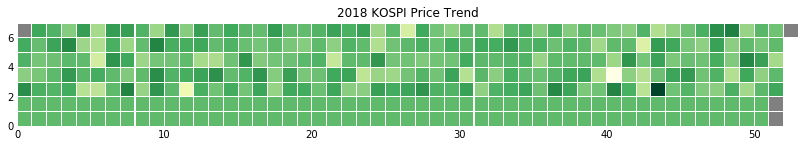

In [1]:
import pandas as pd
import calmap
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 20)

df = pd.read_excel('kospi.xls', parse_dates=['년/월/일'])
print(df.head())
print("\n")

df.columns = ['date', 'price', 'up_down', 'change', 'start', 'high', 'low', 
              'vol_num', 'vol_amt', 'mkt_cap']
df = df.set_index('date', drop=True)
print(df.head())
print("\n")

plt.figure(figsize=(16,8))
calmap.calendarplot(df.change, 
                    monthticks=1, daylabels='MTWTFSS', dayticks=[0, 2, 4, 6], 
                    cmap='YlGn', linewidth=0.05, fillcolor='grey',
                    fig_kws=dict(figsize=(14, 6)),
                    yearlabel_kws=dict(color='black', fontsize=12),                    
                    subplot_kws=dict(title='2018 KOSPI Price Trend'),                        
                    )

plt.show()